In [1]:
%matplotlib inline

# Dataframe data

The most interesting data from an experiment is often reduced to a single value per measurement, e.g., the integral of a time window of a detector signal.  Such data can be stored in Dataframe-like columns, with repeats stored in each row.  This notebook reviews extracting DataFrame data from our hdf5 files.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from e11 import H5Data

In [3]:
# example data
import os 
fil = os.path.join(os.getcwd(), 'example_data', 'array_data.h5')
h5 = H5Data(fil)
# List the datasets that belong to the group `squid=1`.
print(h5.datasets(1))

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 599.54it/s]


('AV_0', 'IMG', 'OSC_0')


In [4]:
# Load data from the hdf5 file,
df, info = h5.df(squids=h5.squids, dataset='AV_0', label=None, ignore_missing=False, info='all')
df.head()

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 187.36it/s]


AB        CD        EF
squid repeat                              
1     0       0.983765  0.984008  0.004351
      1       0.984163  0.984424  0.004799
      2       0.983991  0.984383  0.004606
      3       0.983983  0.984222  0.004568
      4       0.983856  0.984048  0.004349

In this example, AV_0 is the mean oscilloscope signal in a given window.  The window boundaries are stored in info.

In [5]:
info

,A,B,C,D,E,F
squid,,,,,,
1,2127,893,646,709,133,437
2,2127,893,646,709,133,437
3,2127,893,646,709,133,437
4,2127,893,646,709,133,437
5,2127,893,646,709,133,437
6,2127,893,646,709,133,437


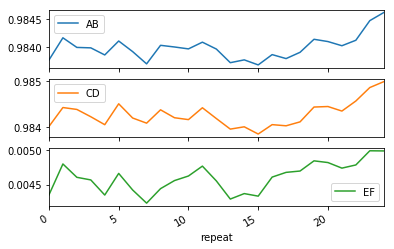

In [6]:
# plot the DataFrame for squid=1
df.loc[1, :].plot(subplots=True)

# output
#outfil = h5.sub_dire('plots', fname='amp_scan.png')
#plt.savefig(outfil, bbox_inches='tight', dpi=200)
plt.show()

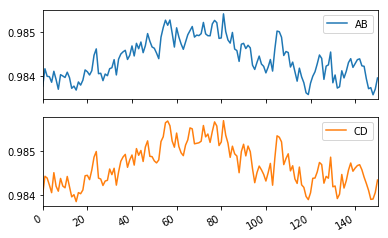

In [7]:
# plot the DataFrame for all squids
df.reset_index()[['AB', 'CD']].plot(subplots=True)

# output
#outfil = h5.sub_dire('plots', fname='amp_scan.png')
#plt.savefig(outfil, bbox_inches='tight', dpi=200)
plt.show()